# Adult comparison

Comparing the results on the Attacks on Adult using the `KClosestVotingClassifier`

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../.."
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import KClosestVotingClassifier
from utils.attack_evaluation import evaluate_attack_distances
from utils.models import load_pickle_bz2
from utils.dataloading.attack_models import load_attack_models

# Loading the Adult data

In [3]:
from utils.dataloading.adult import load_adult_data, load_adult_randomforest # type: ignore

BB = load_adult_randomforest()
BB_DATA = load_adult_data()

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8157
           1       0.79      0.61      0.69      2690

    accuracy                           0.86     10847
   macro avg       0.84      0.78      0.80     10847
weighted avg       0.86      0.86      0.86     10847



##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is the same used to train the Decision Trees

In [4]:
PATH = Path('../../decision_tree_dataset_no3std/adult/experiment_output/')
assert PATH.exists()

In [5]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [6]:
from typing import List, Sequence

import numpy as np
from numpy import ndarray
from numpy.core.fromnumeric import argmax
from numpy.core.shape_base import vstack
from sklearn.base import RegressorMixin
import scipy.spatial.distance as distance
from collections import Counter

In [7]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.67      0.68     25308
         out       0.30      0.33      0.31     10847

    accuracy                           0.57     36155
   macro avg       0.50      0.50      0.50     36155
weighted avg       0.58      0.57      0.57     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.73      0.71     20353
         out       0.30      0.27      0.28      8766

    accuracy                           0.59     29119
   macro avg       0.50      0.50      0.50     29119
weighted avg       0.58      0.59      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.43      0.54      4955
         out       0.30      0.58      0.40      2081

    accuracy                           0.48      7036
   macro avg       0.51      0.51      0.47      7036
weighted avg       0.59      0.48      0.50 

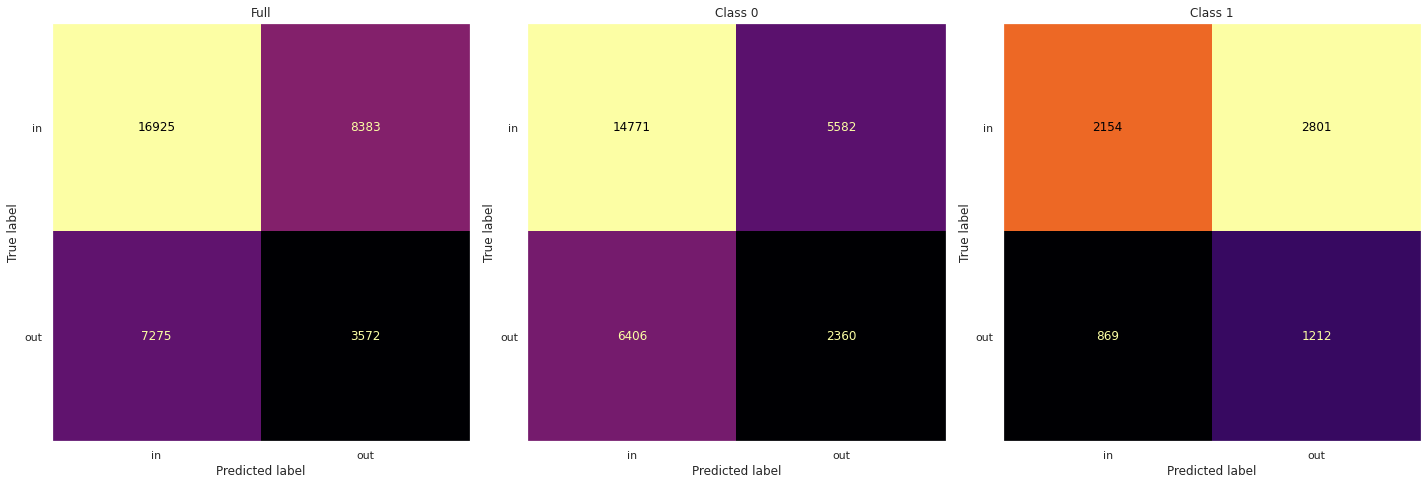

In [8]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `True`

In [9]:
PATH = Path('../../decision_tree_dataset/adult/experiment_output/')
assert PATH.exists()

In [10]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [11]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

In [12]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [ ]:
PATH = Path('../../statistical_no3std/adult/experiment_output/')
assert PATH.exists()

In [ ]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [ ]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

In [ ]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True`

Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [ ]:
PATH = Path('../../statistical/adult/experiment_output/')
assert PATH.exists()

In [ ]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [ ]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

In [ ]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [ ]:
PATH = Path('../../statistical_noisy/adult/experiment_output/')
assert PATH.exists()

In [ ]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [ ]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

In [ ]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [ ]:
PATH = Path('../../statistical_noisy_filter/adult/experiment_output/')
assert PATH.exists()

In [ ]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [ ]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

In [ ]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `False`

Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [ ]:
PATH = Path('../../trepan/noisy/adult/experiment_output/')
assert PATH.exists()

In [ ]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [ ]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

In [ ]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `True`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [ ]:
PATH = Path('../../trepan/noisy_filtering/adult/experiment_output/')
assert PATH.exists()

In [ ]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [ ]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

In [ ]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [ ]:
PATH = Path('../../trepan/statistical/adult/experiment_output/')
assert PATH.exists()

In [ ]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [ ]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

In [ ]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [ ]:
PATH = Path('../../trepan/statistical_filtering/adult/experiment_output/')
assert PATH.exists()

In [ ]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [ ]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

In [ ]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [ ]:
PATH = Path('../../trepan/trepan_statistical_filtering_nobalanced/adult/experiment_output/')
assert PATH.exists()

In [ ]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [ ]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

In [ ]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)